In [274]:
from __future__ import print_function

import os

import pandas as pd
from keras.src.utils.module_utils import tensorflow

In [275]:
# def collect_all_datasets():
base_dir = os.getcwd()
feature_envy_file_path = os.path.join(base_dir, 'datasets', 'feature-envy-2020+2019+2018.csv')
god_class_file_path = os.path.join(base_dir, 'datasets', 'god-class-2020+2019+2018.csv')
long_method_file_path = os.path.join(base_dir, 'datasets', 'long-method-2020+2019+2018.csv')
path_list = [feature_envy_file_path, god_class_file_path, long_method_file_path]
df = pd.concat([pd.read_csv(path) for path in path_list], ignore_index=True)
df.head()

,username,project,package,complextype,method,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,...,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy,is_god_class,is_long_method
0,2020_Team1,jasml-0.10,com.jasml.decompiler,SourceCodeBuilder,com.jasml.decompiler.SourceCodeBuilder::toStri...,1.0,0.0,7.0,4.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
1,2020_Team1,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0.0,0.0,3.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
2,2020_Team1,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0.0,0.0,3.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
3,2020_Team2,jasml-0.10,com.jasml.decompiler,SourceCodeBuilder,com.jasml.decompiler.SourceCodeBuilder::toStri...,1.0,0.0,7.0,4.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
4,2020_Team2,jasml-0.10,com.jasml.compiler,JavaClassDumpper,com.jasml.compiler.JavaClassDumpper::dumpClass...,0.0,0.0,3.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN


In [276]:
print(df.shape)

(1943, 90)


In [277]:
df_updated = df.iloc[:, 3:]
df_updated = df_updated.drop('method', axis=1)
df_updated.head()

,complextype,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,...,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy,is_god_class,is_long_method
0,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
1,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
2,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN
3,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,NaN,NaN
4,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,NaN,NaN


In [278]:
# Convert all NaN values to False
df_updated = df_updated.fillna(False)
df_updated.head()

/var/folders/vt/zp43xh4965ndqdsjwl9_qskr0000gn/T/ipykernel_82162/1616146243.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_updated = df_updated.fillna(False)


,complextype,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,...,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method,is_feature_envy,is_god_class,is_long_method
0,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,False,False
1,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,False,False
2,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,False,False
3,SourceCodeBuilder,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,...,0,2,0,2,0,0,0.0,True,False,False
4,JavaClassDumpper,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,...,0,1,0,3,0,0,0.0,False,False,False


In [279]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

feature_labels = list(df_updated.columns)[1:-3]
code_smell_labels = ['is_feature_envy', 'is_god_class', 'is_long_method']

X = df_updated[feature_labels]
y = df_updated[code_smell_labels]

y_numeric = y.astype(int)
class_indices = np.argmax(y_numeric.values, axis=1)

# Convert class indices to one-hot encoding (optional)
class_indices_reshaped = class_indices.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)

# Y One Hot Encoded
one_hot_encoded = encoder.fit_transform(class_indices_reshaped)

y_ohe = pd.DataFrame(one_hot_encoded, columns=code_smell_labels)

In [280]:
X.head()

,NOP_method,CC_method,ATFD_method,FDP_method,CM_method,MAXNESTING_method,LOC_method,CYCLO_method,NMCS_method,NOLV_method,...,number_not_final_static_methods,number_not_final_not_static_methods,number_standard_design_methods,number_constructor_DefaultConstructor_methods,number_constructor_NotDefaultConstructor_methods,num_final_static_attributes,num_not_final_not_static_attributes,num_final_not_static_attributes,num_static_not_final_attributes,isStatic_method
0,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,3.0,...,1,30,29,0,2,0,2,0,0,0.0
1,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,...,0,10,9,0,1,0,3,0,0,0.0
2,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,...,0,10,9,0,1,0,3,0,0,0.0
3,1.0,0.0,7.0,4.0,0.0,2.0,12.0,3.0,0.0,3.0,...,1,30,29,0,2,0,2,0,0,0.0
4,0.0,0.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,...,0,10,9,0,1,0,3,0,0,0.0


In [281]:
y_ohe.head()

,is_feature_envy,is_god_class,is_long_method
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [282]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=42)

# Split training data into training and validation sets (70% train, 30% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the results
print(f'Scaled Training Set: {X_train_scaled.shape}')
print(f'Scaled Validation Set: {X_val_scaled.shape}')
print(f'Scaled Test Set: {X_test_scaled.shape}')

Scaled Training Set: (1087, 82)
Scaled Validation Set: (467, 82)
Scaled Test Set: (389, 82)


In [283]:
print(y_ohe.shape)

(1943, 3)


In [284]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = y_ohe.shape[1]

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer with 128 units
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
    layers.Dense(32, activation='relu'),  # Additional hidden layer with 32 units
    layers.Dense(16, activation='relu'),  # Another hidden layer with 16 units
    layers.Dense(num_classes, activation='softmax')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
              metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)               │ (None, 128)            │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,539 (84.14 KB)

 Trainable params: 21,539 (84.14 KB)

 Non-trainable params: 0 (0.00 B)

In [285]:
print(X_train_scaled.shape)
print(Y_train.shape)

history = model.fit(X_train_scaled, Y_train,
                    validation_data=(X_val_scaled, Y_val),
                    epochs=50,  # Number of epochs
                    batch_size=32)  # Size of batches


(1087, 82)
(1087, 3)
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4915 - loss: 0.9719 - val_accuracy: 0.8094 - val_loss: 0.5536
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 0.5234 - val_accuracy: 0.8415 - val_loss: 0.4340
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7847 - loss: 0.4764 - val_accuracy: 0.8287 - val_loss: 0.4203
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4429 - val_accuracy: 0.8287 - val_loss: 0.4181
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.3984 - val_accuracy: 0.8051 - val_loss: 0.4308
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.4240 - val_accuracy: 0.8223 - val_loss: 0.4252
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.3849 - val_accuracy: 0.7859 - val_loss: 0.4411
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8269 - loss: 0.3901 - val_accurac

KeyboardInterrupt: 

In [262]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4473 
Test Accuracy: 0.80


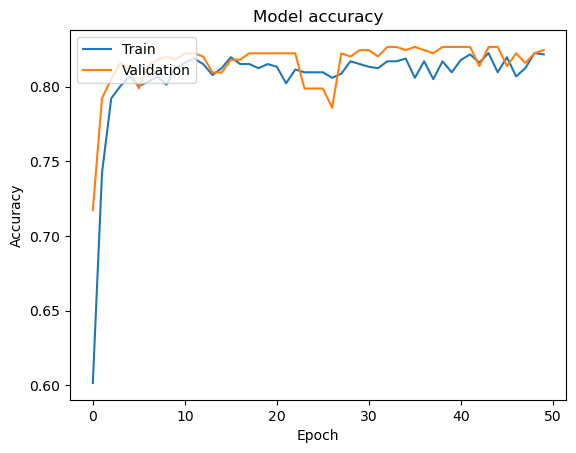

In [263]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [264]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")  # (num_samples, num_features)
print(f"Y_train shape: {Y_train.shape}")  # (num_samples,)

X_train_scaled shape: (1087, 82)
Y_train shape: (1087, 3)


In [265]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization
# from keras.optimizers import Adam, SGD, RMSprop

num_classes = y_ohe.shape[1]

# Define a function to create the model
def create_model(learning_rate, batch_size, optimizer='adam', ):
    model = keras.Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(128, activation='relu'),  # Input layer with 128 units
        layers.Dense(64, activation='relu'),  # Hidden layer with 64 units
        layers.Dense(32, activation='relu'),  # Additional hidden layer with 32 units
        layers.Dense(16, activation='relu'),  # Another hidden layer with 16 units
        layers.Dense(num_classes, activation='softmax')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
                  metrics=['accuracy'])
    return model


# Create a KerasClassifier
model = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'model__learning_rate': [0.001, 0.01, 0.1],
    'model__batch_size': [16, 32, 64]
}


# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy', verbose=True)
grid_result = grid.fit(X_train_scaled, Y_train)

results = grid.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean accuracy: {mean_score:.3f} for {params}")

# Print best parameters
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mean accuracy: 0.788 for {'model__batch_size': 16, 'model__learning_rate': 0.001}
Mean accuracy: 0.789 for {'model__batch_size': 16, 'model__learning_rate': 0.01}
Mean accuracy: 0.793 for {'model__batch_size': 16, 'model__learning_rate': 0.1}
Mean accuracy: 0.791 for {'model__batch_size': 32, 'model__learning_rate': 0.001}
Mean accuracy: 0.786 for {'model__batch_size': 32, 'model__learning_rate': 0.01}
Mean accuracy: 0.790 for {'model__batch_size': 32, 'model__learning_rate': 0.1}
Mean accuracy: 0.789 for {'model__batch_size': 64, 'model__learning_rate': 0.001}
Mean accuracy: 0.789 for {'model__batch_size': 64, 'model__learning_rate': 0.01}
Mean accuracy: 0.789 for {'model__batch_size': 64, 'model__learning_rate': 0.1}
Best: 0.7929850996149339 using {'model__batch_size': 16, 'model__learning_rate': 0.1}


In [266]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
# 
# model = Sequential([
#     # Input LSTM layer
#     LSTM(units=128, return_sequences=True, input_shape=(timesteps, features)),
#     BatchNormalization(),
#     Dropout(0.3),
#     
#     # Second LSTM layer
#     LSTM(units=64, return_sequences=False),
#     BatchNormalization(),
#     Dropout(0.2),
#     
#     # Output layer
#     Dense(units=1, activation='linear')
# ])
# 
# # Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [499]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization,Bidirectional
from tensorflow.keras import layers,Input
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import ReduceLROnPlateau




In [544]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [545]:
# Reshape data for LSTM [samples, time_steps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_lstm = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f'X_train_lstm shape: {X_train_lstm.shape}')
print(f'X_val_lstm shape: {X_val_lstm.shape}')
print(f'X_test_lstm shape: {X_test_lstm.shape}')

X_train_lstm shape: (1087, 1, 82)
X_val_lstm shape: (467, 1, 82)
X_test_lstm shape: (389, 1, 82)


In [546]:

##Above working with accuracy 83%

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)


model = Sequential()

model.add(Input(shape=(1, X_train_scaled.shape[1])))
# model.add(LSTM(units=128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.05), return_sequences=True))
model.add((LSTM(units=256, activation='relu', return_sequences=True,kernel_regularizer=l2(0.01))))
model.add(Dropout(0.2))

#0.83 with 0.2 dropout rate for both
# Add LSTM layers
model.add((LSTM(units=128, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))  # Add dropout for regularization

# Add more LSTM layers
model.add((LSTM(units=64, activation='relu')))
model.add(Dropout(0.2))

# Fully connected layer
model.add(Dense(units=32, activation='relu'))


# Output layer for multi-class classification (code smells)
model.add(Dense(num_classes, activation='softmax'))

#Same results with and without Bidirectional LSTM
#Batch normalization decreases the accuracy





In [547]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=AdamW(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])




In [548]:
print(X_train_lstm.shape)
print(Y_train.shape)
print(X_val_lstm.shape)
print(Y_val.shape)
history = model.fit(X_train_lstm, Y_train, validation_data=(X_val_lstm, Y_val), epochs=50, batch_size=32, callbacks=[reduce_lr])




(1087, 1, 82)
(1087, 3)
(467, 1, 82)
(467, 3)
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6098 - loss: 2.1718 - val_accuracy: 0.6146 - val_loss: 1.1940 - learning_rate: 0.0010
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6345 - loss: 1.0237 - val_accuracy: 0.6146 - val_loss: 0.7959 - learning_rate: 0.0010
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6742 - loss: 0.7218 - val_accuracy: 0.7366 - val_loss: 0.6250 - learning_rate: 0.0010
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7348 - loss: 0.6081 - val_accuracy: 0.7580 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7276 - loss: 0.5944 - val_accuracy: 0.7559 - val_loss: 0.5766 - learning_rate: 0.0010
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7578 - loss: 0.5381 - val_accuracy: 0.7816 - val_loss: 0.6800 - learning_rate: 0.0010
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

In [549]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_lstm, Y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Get validation accuracy from training history
val_accuracy = history.history['val_accuracy'][-1]  # Get the final validation accuracy
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f"Best Parameters: {grid_result.best_params_}")



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.4843 
Test Accuracy: 0.81
Validation Accuracy: 0.84
Best Parameters: {'model__batch_size': 16, 'model__learning_rate': 0.1}


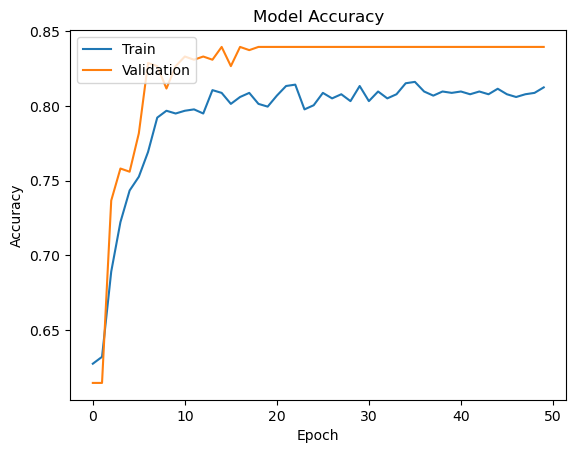

In [550]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [551]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming your test dataset inputs are X_test_lstm and labels are Y_test
predictions = model.predict(X_test_lstm)  # Predict probabilities
predicted_classes = np.argmax(predictions, axis=1)  # Get class indices
true_classes = np.argmax(Y_test.values, axis=1)  # True labels


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


bELOW CELLS ARE FOR REPORT PURPOSE


In [552]:
cm = confusion_matrix(true_classes, predicted_classes)


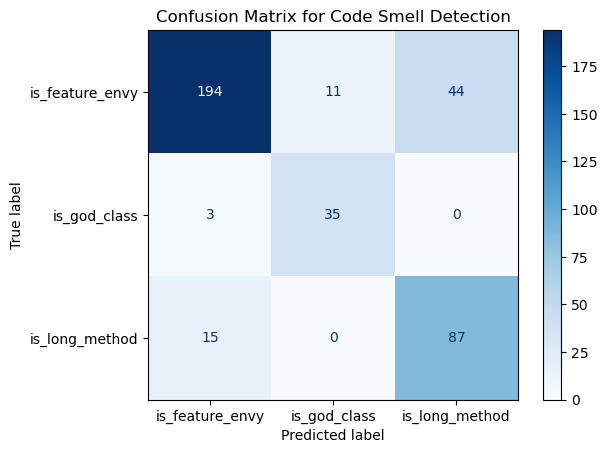

In [553]:
import matplotlib.pyplot as plt

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=code_smell_labels)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Code Smell Detection")
plt.show()


In [554]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [556]:
# Ensure your X_test is reshaped for LSTM input
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Now predict with the reshaped input data
predictions = model.predict(X_test_lstm)  # Predict probabilities

# Convert probabilities to class labels (argmax will get the index of the maximum value)
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class labels

# If Y_test is one-hot encoded, convert true labels to class indices using argmax
true_classes = np.argmax(Y_test.values, axis=1)  # True class labels

# Now calculate accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average=None)  # Precision for each class
recall = recall_score(true_classes, predicted_classes, average=None)  # Recall for each class
f1 = f1_score(true_classes, predicted_classes, average=None)  # F1 score for each class

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'is_feature_envy': [accuracy, precision[0], recall[0], f1[0]],
    'is_god_class': [accuracy, precision[1], recall[1], f1[1]],
    'is_long_method': [accuracy, precision[2], recall[2], f1[2]],
})

print(metrics_table)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
      Metric  is_feature_envy  is_god_class  is_long_method
0   Accuracy         0.812339      0.812339        0.812339
1  Precision         0.915094      0.760870        0.664122
2     Recall         0.779116      0.921053        0.852941
3   F1-Score         0.841649      0.833333        0.746781
